In [3]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import pandas as pd
import time
import progressbar

In [4]:
tweets_df = pd.read_csv("search_tweets.csv")

In [5]:
len(tweets_df["Text"])

100

In [6]:
class_data = []
p_positive = []
p_negative = []

In [7]:
count = 0

bar = progressbar.ProgressBar(max_value=len(tweets_df["Text"]))

for tweet in tweets_df["Text"]:
    analysis = TextBlob(tweet, analyzer=NaiveBayesAnalyzer()).sentiment
    class_data.append(analysis[0])
    p_positive.append(analysis[1])
    p_negative.append(analysis[2])
    #print(count)
    count+=1
    bar.update(count)

100% (100 of 100) |######################| Elapsed Time: 0:03:37 ETA:  00:00:00

In [8]:
tweets_df["classification"] = class_data
tweets_df["p_positive"] = p_positive
tweets_df["p_negative"] = p_negative

In [9]:
tweets_df

,ID,Text,classification,p_positive,p_negative
0,1490112655620771842,RT @cryptOhGaga: @wildkait Little something I'...,pos,0.706080,0.293920
1,1490111746081804288,@KessInvesting Thank for this kess. In the spi...,pos,0.783551,0.216449
2,1490111715517755394,RT @DefinitionBot: Count of mentions for the t...,neg,0.233444,0.766556
3,1490111710866583552,RT @DefinitionBot: Count of mentions for the t...,neg,0.233444,0.766556
4,1490111706088947712,RT @DefinitionBot: Count of mentions for the t...,neg,0.233444,0.766556
...,...,...,...,...,...
95,1490085184724774914,$SPY $TSLA $LCID $AMZN $NVDA All 5 posted idea...,pos,0.508655,0.491345
96,1490085007574159365,RT @JaboodyShow: 🔴 We are LIVE!\n\nToday we ar...,pos,0.725837,0.274163
97,1490084859397943296,RT @Stock_Market_Pr: Need Fast Computer? i7 47...,pos,0.878626,0.121374
98,1490084850111422466,RT @Stock_Market_Pr: Need Fast Computer? i7 47...,pos,0.878626,0.121374


In [10]:
tweets_df["classification"].value_counts()

neg    64
pos    36
Name: classification, dtype: int64

<AxesSubplot:title={'center':'Sentiment Analysis'}, ylabel='classification'>

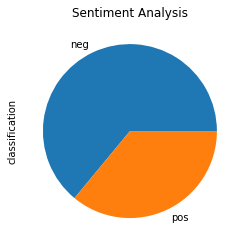

In [12]:
tweets_df["classification"].value_counts().plot(kind="pie",title="Sentiment Analysis")

In [13]:
tweets_df.to_csv("sentiment_analysis_NVIDIA.csv",index=False)